# Customer Churn Prediction

C:\Users\venka\AppData\Local\Temp\ipykernel_22012\325275292.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#66b3ff','#ff9999'])


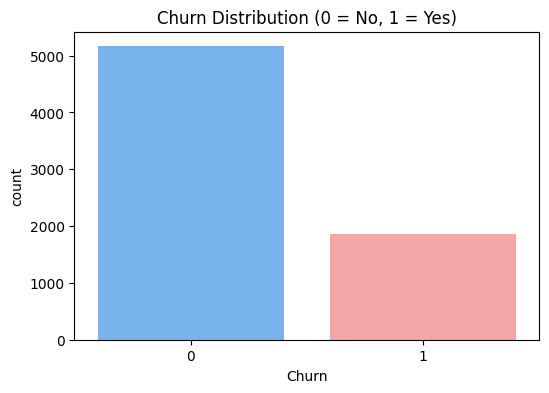

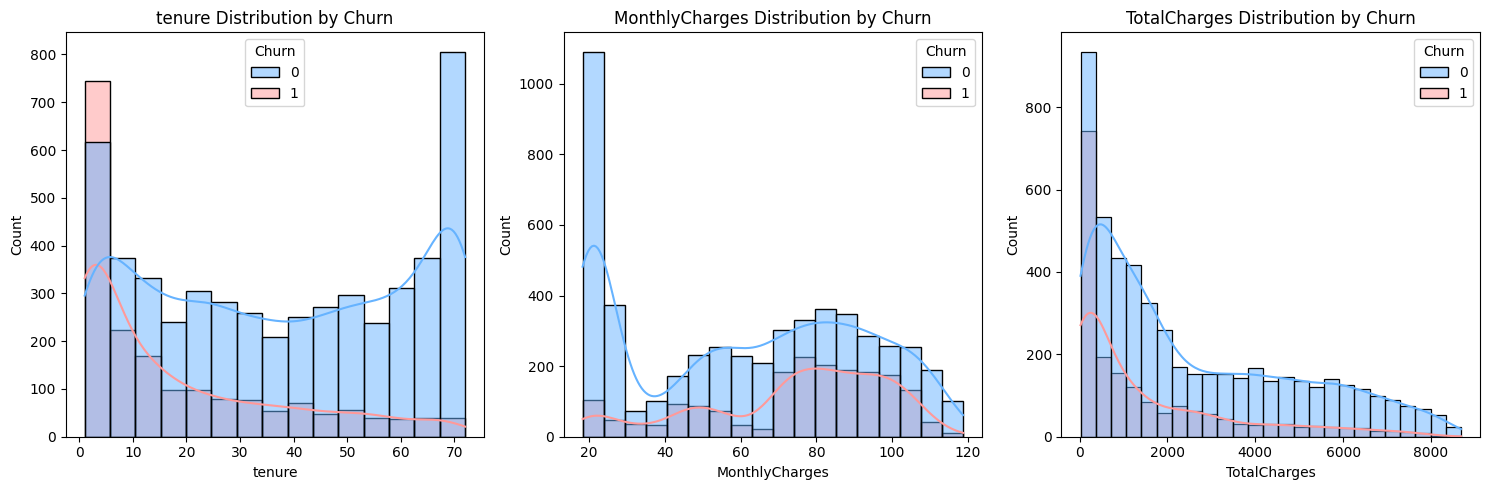

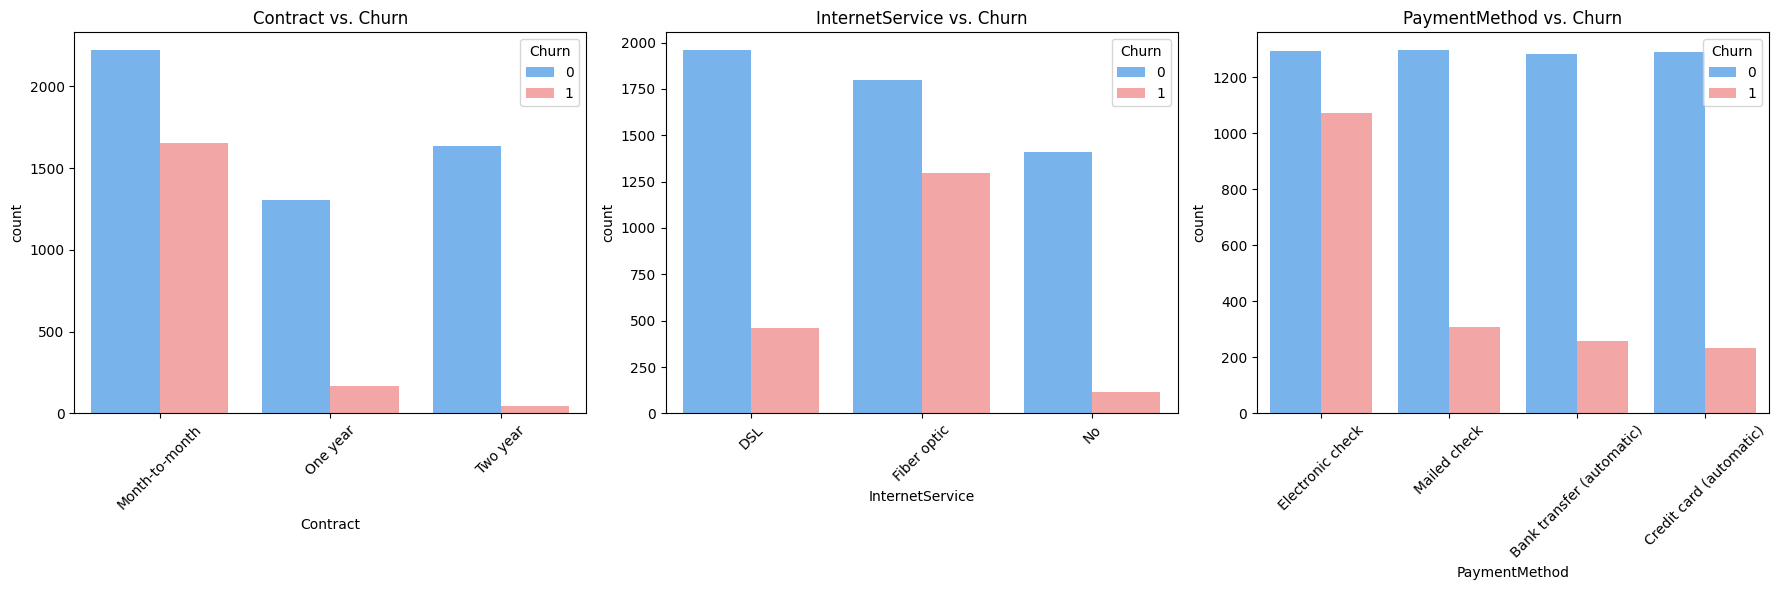

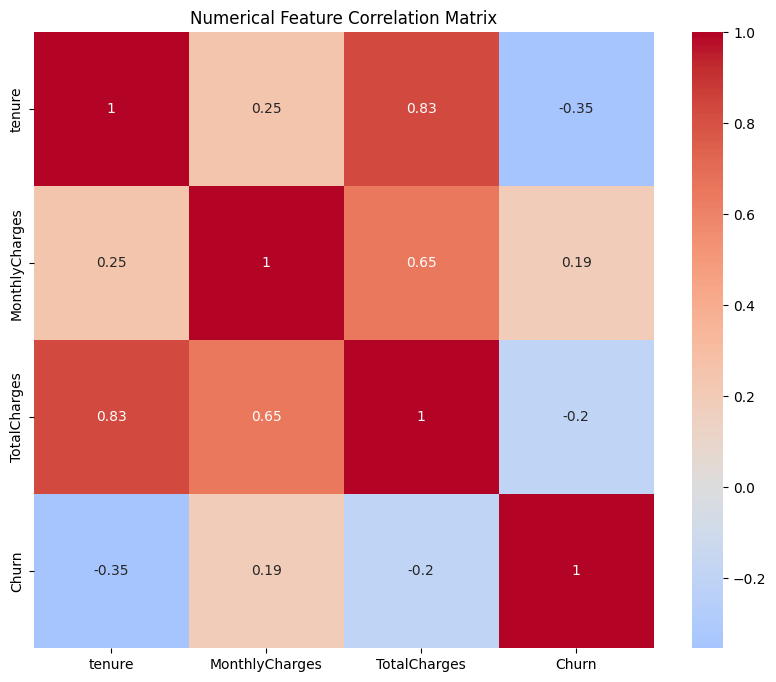


Cross-Validating Logistic Regression
Mean Accuracy: 0.7488
Mean Precision: 0.5179
Mean Recall: 0.7973
Mean F1: 0.6278
Mean ROC AUC: 0.8458

Cross-Validating SVM
Mean Accuracy: 0.7036
Mean Precision: 0.4680
Mean Recall: 0.8368
Mean F1: 0.6002
Mean ROC AUC: 0.8429

Cross-Validating Random Forest
Mean Accuracy: 0.7527
Mean Precision: 0.5228
Mean Recall: 0.7967
Mean F1: 0.6312
Mean ROC AUC: 0.8447

Cross-Validating Gradient Boosting
Mean Accuracy: 0.7993
Mean Precision: 0.6640
Mean Recall: 0.4970
Mean F1: 0.5679
Mean ROC AUC: 0.8483

Cross-Validating XGBoost
Mean Accuracy: 0.7564
Mean Precision: 0.5278
Mean Recall: 0.7953
Mean F1: 0.6345
Mean ROC AUC: 0.8462

Cross-Validation Performance Comparison:
                     Accuracy  Precision    Recall        F1   ROC AUC
Gradient Boosting    0.799289   0.664030  0.496990  0.567876  0.848328
XGBoost              0.756444   0.527809  0.795318  0.634455  0.846245
Logistic Regression  0.748800   0.517897  0.797324  0.627844  0.845790
Random For

<Figure size 1200x600 with 0 Axes>

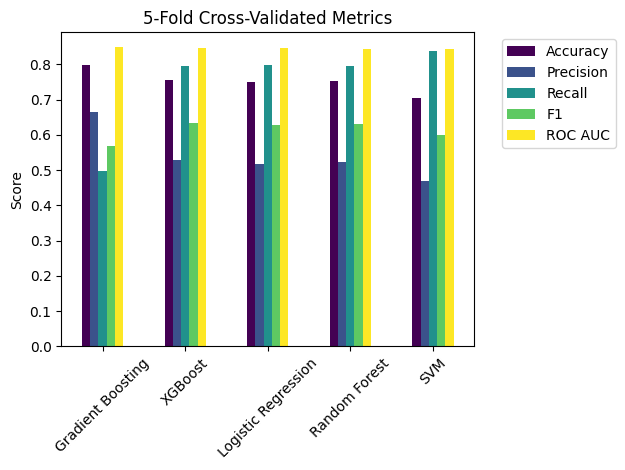


Final Evaluation: Logistic Regression on Test Set

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.90      0.70      0.79      1033
       Churn       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



<Figure size 600x500 with 0 Axes>

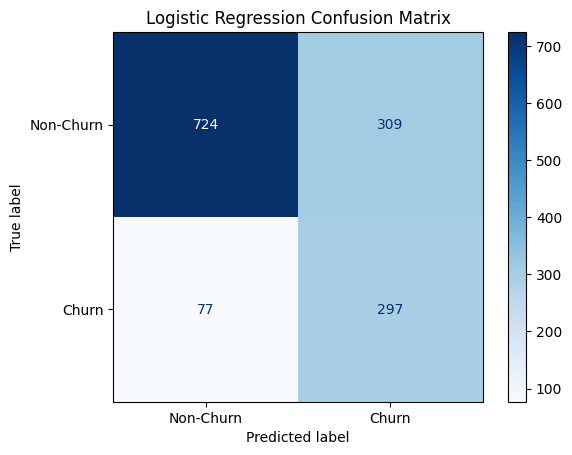


Final Evaluation: SVM on Test Set

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.91      0.64      0.75      1033
       Churn       0.45      0.82      0.58       374

    accuracy                           0.69      1407
   macro avg       0.68      0.73      0.67      1407
weighted avg       0.78      0.69      0.70      1407



<Figure size 600x500 with 0 Axes>

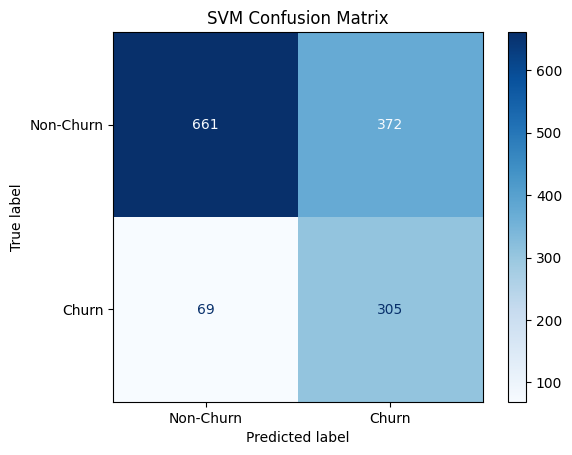


Final Evaluation: Random Forest on Test Set

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.91      0.70      0.79      1033
       Churn       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



<Figure size 600x500 with 0 Axes>

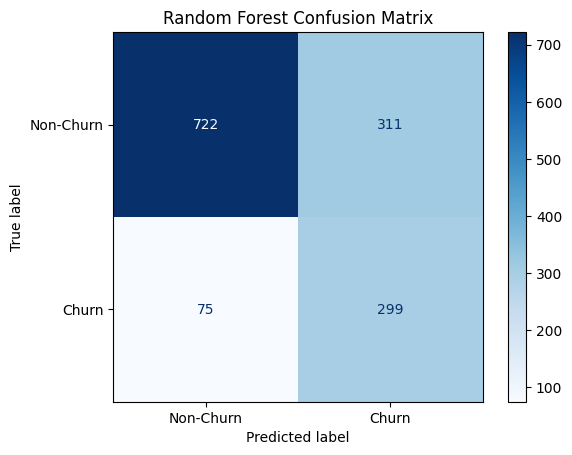


Final Evaluation: Gradient Boosting on Test Set

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.83      0.90      0.86      1033
       Churn       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



<Figure size 600x500 with 0 Axes>

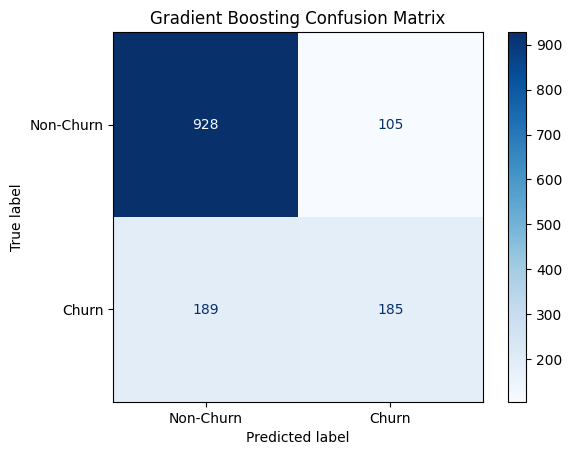


Final Evaluation: XGBoost on Test Set

Classification Report:
              precision    recall  f1-score   support

   Non-Churn       0.90      0.71      0.79      1033
       Churn       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



<Figure size 600x500 with 0 Axes>

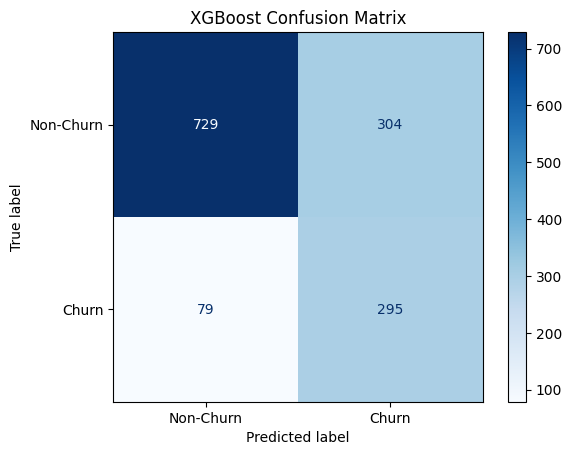


Test Set Performance Comparison:
                     Accuracy  Precision    Recall        F1   ROC AUC
Gradient Boosting    0.791045   0.637931  0.494652  0.557229  0.839909
Random Forest        0.725657   0.490164  0.799465  0.607724  0.836599
Logistic Regression  0.725657   0.490099  0.794118  0.606122  0.834218
XGBoost              0.727790   0.492487  0.788770  0.606372  0.833914
SVM                  0.686567   0.450517  0.815508  0.580400  0.826163


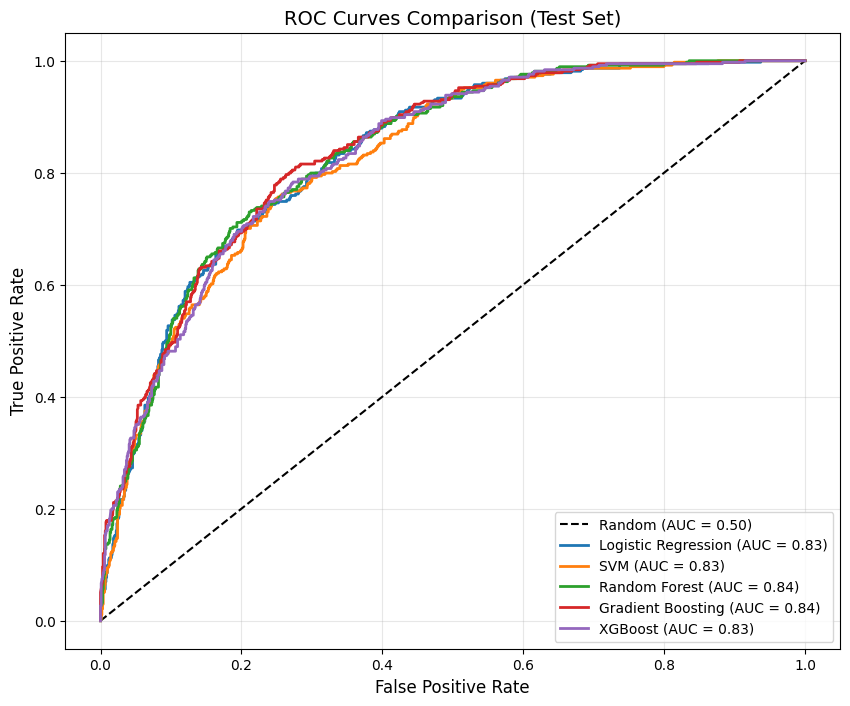

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix, 
                            ConfusionMatrixDisplay, classification_report, roc_curve, auc)

# Loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data cleaning
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.drop('customerID', axis=1, inplace=True)
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})


# 1. Target Distribution (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette=['#66b3ff','#ff9999'])
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()

# 2. Numerical Features vs. Churn
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, palette=['#66b3ff','#ff9999'])
    plt.title(f'{col} Distribution by Churn')
plt.tight_layout()
plt.show()

# 3. Categorical Features vs. Churn
cat_features = ['Contract', 'InternetService', 'PaymentMethod']
plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, hue='Churn', data=df, palette=['#66b3ff','#ff9999'])
    plt.title(f'{col} vs. Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_features + ['Churn']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Numerical Feature Correlation Matrix')
plt.show()

# Model Preparation with 20% Test Split
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract',
                       'PaperlessBilling', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])

# Model Configuration
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42, C=0.1, kernel='linear'),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth=3),
    'XGBoost': XGBClassifier(
        scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
        learning_rate=0.1,
        max_depth=3,
        reg_alpha=0.1,
        reg_lambda=1.0,
        n_estimators=200, 
        random_state=42
    ),
}


# K-Fold Cross Validation

# Defining evaluation metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Cross-Validating {name}")
    print(f"{'='*50}")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform cross-validation
    scores = cross_validate(
        pipeline, 
        X_train,  # Only use training data for CV
        y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=False
    )
    
    # Storing mean scores
    cv_results[name] = {
        'Accuracy': np.mean(scores['test_accuracy']),
        'Precision': np.mean(scores['test_precision']),
        'Recall': np.mean(scores['test_recall']),
        'F1': np.mean(scores['test_f1']),
        'ROC AUC': np.mean(scores['test_roc_auc'])
    }
    
    # Print CV results
    print(f"Mean Accuracy: {np.mean(scores['test_accuracy']):.4f}")
    print(f"Mean Precision: {np.mean(scores['test_precision']):.4f}")
    print(f"Mean Recall: {np.mean(scores['test_recall']):.4f}")
    print(f"Mean F1: {np.mean(scores['test_f1']):.4f}")
    print(f"Mean ROC AUC: {np.mean(scores['test_roc_auc']):.4f}")

# Display CV results
cv_results_df = pd.DataFrame(cv_results).T.sort_values('ROC AUC', ascending=False)
print("\nCross-Validation Performance Comparison:")
print(cv_results_df)

# Visualize CV metrics
plt.figure(figsize=(12,6))
cv_results_df.plot(kind='bar', colormap='viridis')
plt.title('5-Fold Cross-Validated Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Final Model Evaluation on Test Set
final_results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Final Evaluation: {name} on Test Set")
    print(f"{'='*50}")
    
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
 
    pipeline.fit(X_train, y_train)
    
 
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:,1]
    

    final_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }
    
    #Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-Churn', 'Churn']))
    
    # Confusion matrix
    plt.figure(figsize=(6,5))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Churn', 'Churn'])
    disp.plot(cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# Compare test set results
final_results_df = pd.DataFrame(final_results).T.sort_values('ROC AUC', ascending=False)
print("\nTest Set Performance Comparison:")
print(final_results_df)

# ROC Curves Comparison
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

model_colors = {
    'Logistic Regression': '#1f77b4',
    'SVM': '#ff7f0e',
    'Random Forest': '#2ca02c',
    'Gradient Boosting': '#d62728',
    'XGBoost': '#9467bd'
}

for name, model in models.items():
    pipeline.fit(X_train, y_train)
    X_test_processed = preprocessor.transform(X_test)
    y_proba = model.predict_proba(X_test_processed)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=model_colors[name], lw=2, 
             label=f'{name} (AUC = {roc_auc:.2f})')

plt.title('ROC Curves Comparison (Test Set)', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()